In [1]:
import importlib
import eval_functions
importlib.reload(eval_functions)
from eval_functions import *
import pandas as pd
from enum import Enum
import numpy as n

# make tables interactive
from itables import init_notebook_mode
import itables.options as opt
init_notebook_mode(all_interactive=True, connected=True)
opt.maxBytes=0

In [2]:
NOODLER_VERSION="notcont-721245e-84ecd6a"
OLD_NOODLER_VERSION="130017a-84ecd6a"
if NOODLER_VERSION == "":
    NOODLER_VERSION = OLD_NOODLER_VERSION
NOODLER=f"z3-noodler-{NOODLER_VERSION}"
NOODLER_ONLY_STABILIZATION=f"z3-noodler-only-stabilization-{NOODLER_VERSION}"
NOODLER_STATS=f"z3-noodler-stats-{NOODLER_VERSION}"
NOODLER_NO_NIELSEN_STATS=f"z3-noodler-no-nielsen-stats-{NOODLER_VERSION}"
NOODLER_NO_LENGTH_STATS=f"z3-noodler-no-length-stats-{NOODLER_VERSION}"
NOODLER_NO_MEMB_STATS=f"z3-noodler-no-memb-stats-{NOODLER_VERSION}"
NOODLER_STATS=f"z3-noodler-stats-{NOODLER_VERSION}"
NOODLER_MODEL=f"z3-noodler-model-{NOODLER_VERSION}"
NOODLER_CHECK_MODEL=f"check-model-{NOODLER_VERSION}"
OLD_NOODLER=f"z3-noodler-{OLD_NOODLER_VERSION}"
OLD_NOODLER_MODEL=f"z3-noodler-model-{OLD_NOODLER_VERSION}"
CVC5="cvc5-1.2.0"
CVC5_MODEL="cvc5-model-1.2.0"
Z3="z3-4.13.3"
Z3_MODEL="z3-model-4.13.0"
Z3STR4="z3str4"
OSTRICH="ostrich-70545314"
Z3STR3RE="z3strRE"
Z3TRAU="z3-trau-1.1"
Z3ALPHA="z3-alpha-smtcomp2024"

# Timeout (in seconds) 
TIMEOUT=120

if NOODLER == "":
  NOODLER = OLD_NOODLER

TOOLS = list(dict.fromkeys([ # small hack so that we get list of unique values (i.e. a set, but also in the given order; see https://stackoverflow.com/questions/1653970/does-python-have-an-ordered-set)
    NOODLER,
    OLD_NOODLER,
    CVC5,
    Z3,
    # NOODLER_MODEL,
    # OLD_NOODLER_MODEL,
    # CVC5_MODEL,
    # Z3_MODEL,
    # NOODLER_CHECK_MODEL,
    # NOODLER_STATS,
    # NOODLER_NO_NIELSEN_STATS,
    # NOODLER_NO_LENGTH_STATS,
    # NOODLER_NO_MEMB_STATS,
    # NOODLER_ONLY_STABILIZATION,
    # Z3STR4,
    # Z3ALPHA,
    OSTRICH,
    # Z3STR3RE,
    # Z3TRAU,

    # you can add more tools here directly if needed
]))

VBS = [
    # [Z3, CVC5],
    # [NOODLER, CVC5],
    # [NOODLER, Z3],
    # [NOODLER, Z3, CVC5],
]

TOOLS_STATS = [NOODLER_STATS, NOODLER_NO_NIELSEN_STATS, NOODLER_NO_LENGTH_STATS, NOODLER_NO_MEMB_STATS]


bench_selection = (
  # Select one:
    # "NORMAL"
    # "INT_CONVS"
    # "QF_S"
    # "QF_SLIA"
    # "QF_SNIA"
    # "ZALIGVINDER"
    # "REGEX"
    "NOTCONTAINS"
    #"FMBENCHMARKS"
)

if bench_selection == "NORMAL":
  BENCHES = [
      "sygus_qgen",
      "denghang",
      "automatark",
      "stringfuzz",
      "redos",

      "norn",
      "slog",
      "slent",
      "omark",
      "kepler",
      "woorpje",
      "webapp",
      "kaluza",

      "transducer_plus",
      "leetcode",
      "str_small_rw",
      "pyex",
      "full_str_int",

      "snia",
      ]
elif bench_selection == "INT_CONVS":
  # Only benchmarks with to_int/from_int
  BENCHES = [
      "stringfuzz",
      "str_small_rw",
      "full_str_int",
  ]
elif bench_selection == "QF_S":
  BENCHES = [
      "sygus_qgen",
      "automatark",

      "slog",
      "woorpje",
  ]
elif bench_selection == "QF_SLIA":
  BENCHES = [
      "denghang",
      "stringfuzz",

      "norn",
      "slent",
      "transducer_plus",
      "kepler",
      "woorpje",
      "webapp",
      "kaluza",
      "redos",

      "leetcode",
      "str_small_rw",
      "pyex",
      "full_str_int",
  ]
elif bench_selection == "QF_SNIA":
  BENCHES = [
    "snia"
  ]
elif bench_selection == "ZALIGVINDER":
  BENCHES = [
    "zaligvinder"
  ]
elif bench_selection == "REGEX":
  BENCHES = [
    "regex"
  ]
elif bench_selection == "NOTCONTAINS":
  # benchmarks used in not contains paper (probably)
  BENCHES = [
    "position_hard",
    "django",
    "thefuck",
    "biopython",
    #"notcontains",
  ]
elif bench_selection == "FMBENCHMARKS":
  # benchmarks used in FM'23 paper
  BENCHES = [
    "pyex_hard",
    "kaluza_hard",
    "str_2",
    "slog_old",
  ]

REGEX_GROUP_NAME = "regex"
EQUATIONS_GROUP_NAME = "equations"
PREDICATES_GROUP_NAME = "predicates"

REGEX_BENCHES = [
    "sygus_qgen",
    "denghang",
    "automatark",
    "stringfuzz",
    "redos",
]

EQUATIONS_BENCHES = [
    "norn",
    "slog",
    "slent",
    "omark",
    "kepler",
    "woorpje",
    "webapp",
    "kaluza",
    "snia",

    "pyex_hard",
    "kaluza_hard",
    "str_2",
    "slog_old",
]

PREDICATES_BENCHES = [
    "transducer_plus",
    "leetcode",
    "str_small_rw",
    "pyex",
    "full_str_int",

    "django",
    "thefuck",
    "biopython",
    "notcontains",
    "position_hard",
]

BENCHMARK_TO_GROUP = {regex_bench:REGEX_GROUP_NAME for regex_bench in REGEX_BENCHES} | {eq_bench:EQUATIONS_GROUP_NAME for eq_bench in EQUATIONS_BENCHES} | {pred_bench:PREDICATES_GROUP_NAME for pred_bench in PREDICATES_BENCHES}

BENCHES_GROUPS = {
    REGEX_GROUP_NAME: REGEX_BENCHES,
    EQUATIONS_GROUP_NAME: EQUATIONS_BENCHES,
    PREDICATES_GROUP_NAME: PREDICATES_BENCHES,
}

In [3]:
df_all = load_benches(BENCHES, TOOLS, bench_selection, BENCHMARK_TO_GROUP, TIMEOUT) # last parameter is timeout

# TODO VBS are ugly for now, will fix it
for vbs in VBS:
  name = "+".join(vbs)
  df_all = add_vbs(df_all, vbs, name)
  df_all_stats = add_vbs(df_all_stats, vbs, name)
  TOOLS.append(name)
  # tool_names_mapping[name] = " + ".join([tool_names_mapping[tool] for tool in vbs])

df_all["benchmark_group"] = pd.Categorical(df_all["benchmark"].apply(lambda x: BENCHMARK_TO_GROUP[x]), categories=[EQUATIONS_GROUP_NAME, PREDICATES_GROUP_NAME, REGEX_GROUP_NAME], ordered=True)

### Evaluation

In [4]:
print(simple_table(df_all, TOOLS, BENCHES, separately=False))
print(simple_table(df_all, TOOLS, BENCHES, separately=True))

# of formulae: 150287
--------------------------------------------------
tool                                    ✅    ❌        time    avg    med    std    sat    unsat    unknown    TO    MO+ERR    other
----------------------------------  ------  ----  ----------  -----  -----  -----  -----  -------  ---------  ----  --------  -------
z3-noodler-notcont-721245e-84ecd6a  150077   210     7605.77   0.05   0.01   0.50  18026   132051          0   183        27        0
z3-noodler-130017a-84ecd6a          148779  1508     9567.59   0.06   0.01   1.05  17208   131571       1065   417        26        0
cvc5-1.2.0                          149668   619    18040.94   0.12   0.02   1.49  18216   131452          0   619         0        0
z3-4.13.3                           148141  2146    32620.54   0.22   0.01   2.92  17691   130450          0  2144         2        0
ostrich-70545314                    141380  8907  1849465.87  13.08   5.74  19.35  13345   128035          0  8907         0 

In [4]:
TOOL_FOR_COMPARISON = NOODLER
# TOOL_FOR_COMPARISON = NOODLER_MODEL
# TOOL_FOR_COMPARISON = NOODLER_CHECK_MODEL
# TOOL_FOR_COMPARISON =

In [48]:
cactus_plot(df_all, [tool for tool in TOOLS if tool not in [
    NOODLER_STATS,
    NOODLER_NO_NIELSEN_STATS,
    NOODLER_NO_LENGTH_STATS,
    NOODLER_NO_MEMB_STATS,
    NOODLER_ONLY_STABILIZATION,
]], start=int(len(df_all)*0.5), 
height=3, width=16, put_legend_outside=True, logarithmic_y_axis=True,
timeout=TIMEOUT,
                  # num_of_x_ticks=6,
                ).show()

AttributeError: 'Axes' object has no attribute 'show'

/Users/vhavlena/Documents/VeriFIT/Repo/String/smt-string-bench-results/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


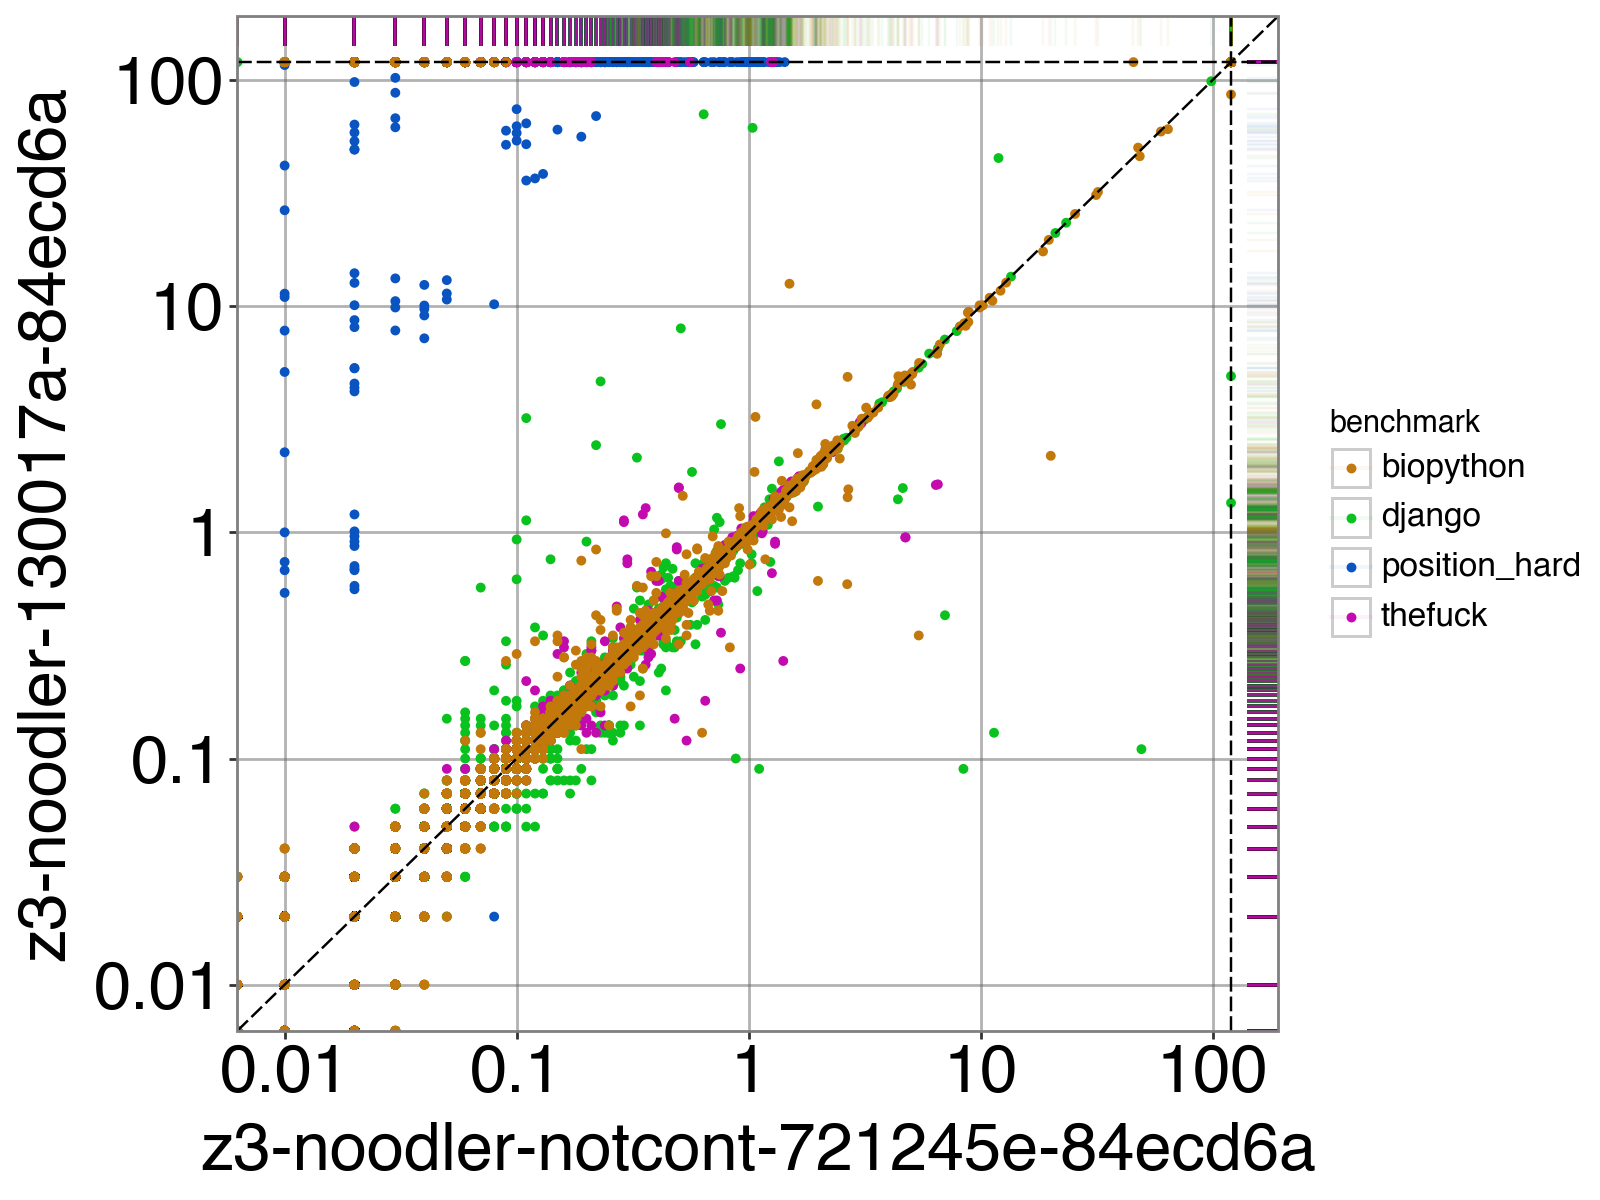

/Users/vhavlena/Documents/VeriFIT/Repo/String/smt-string-bench-results/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


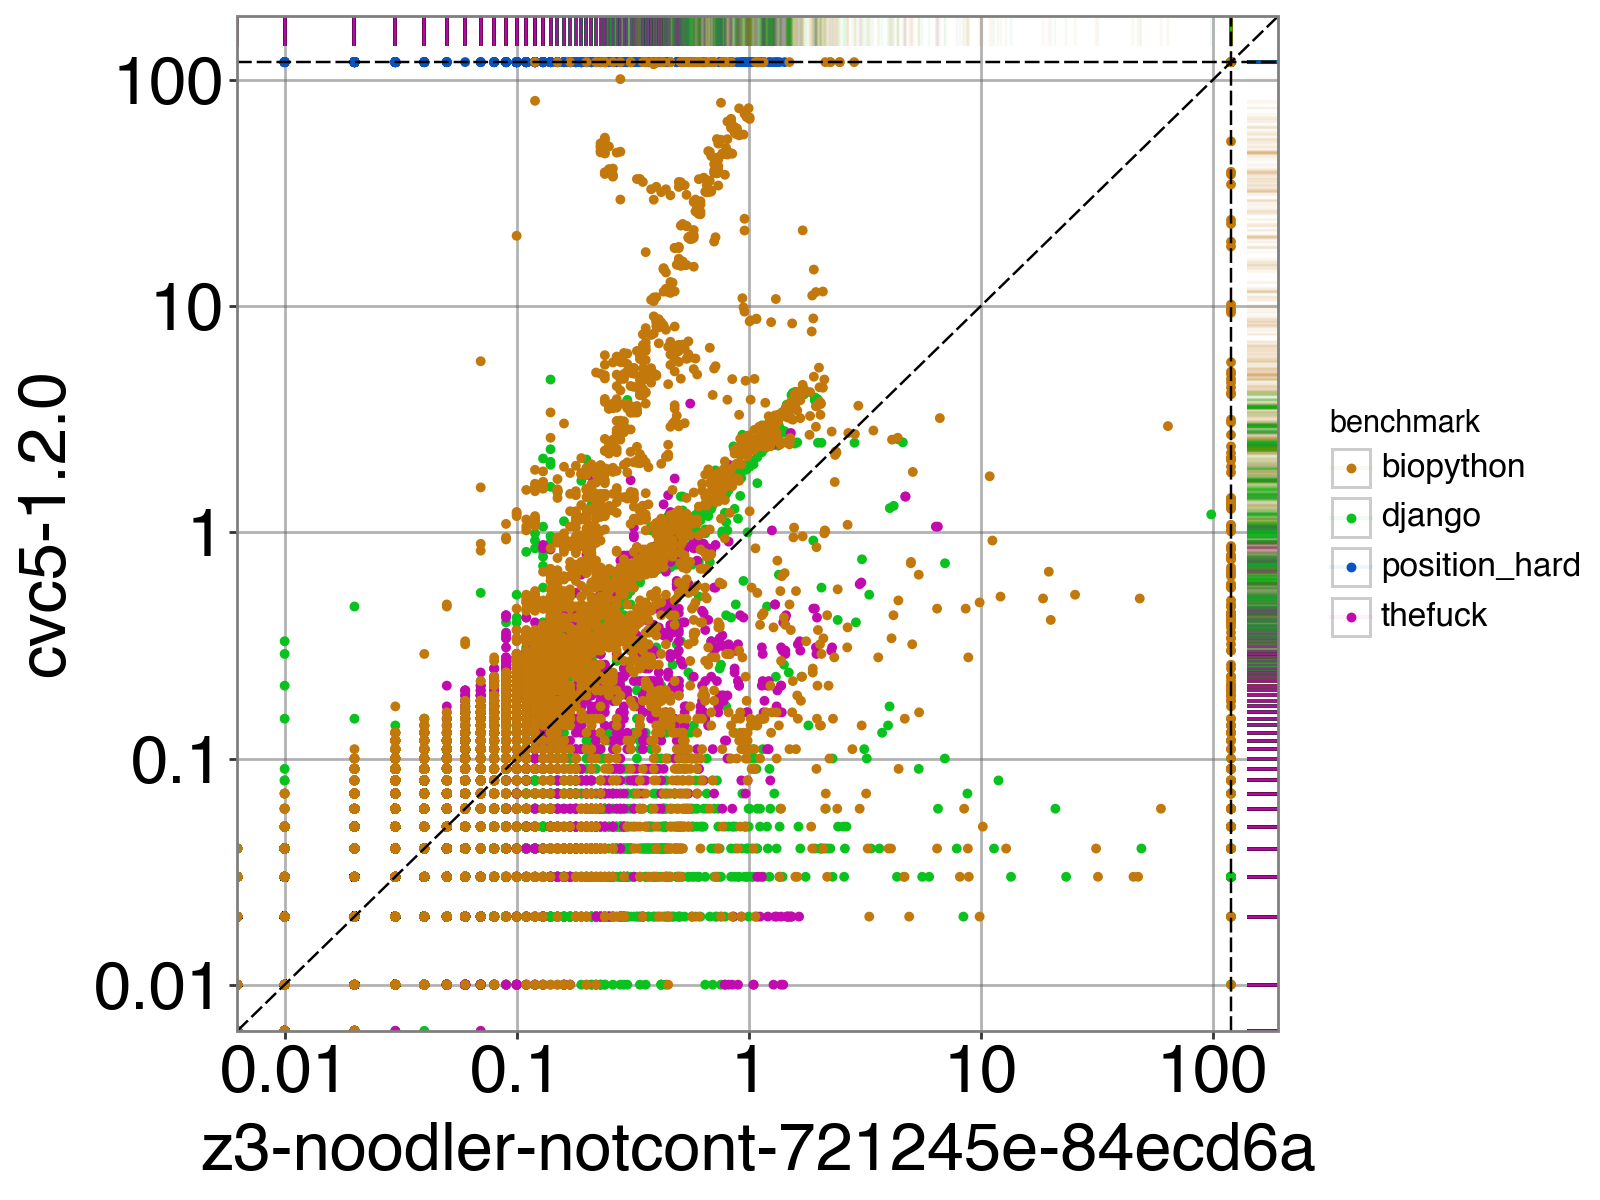

/Users/vhavlena/Documents/VeriFIT/Repo/String/smt-string-bench-results/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


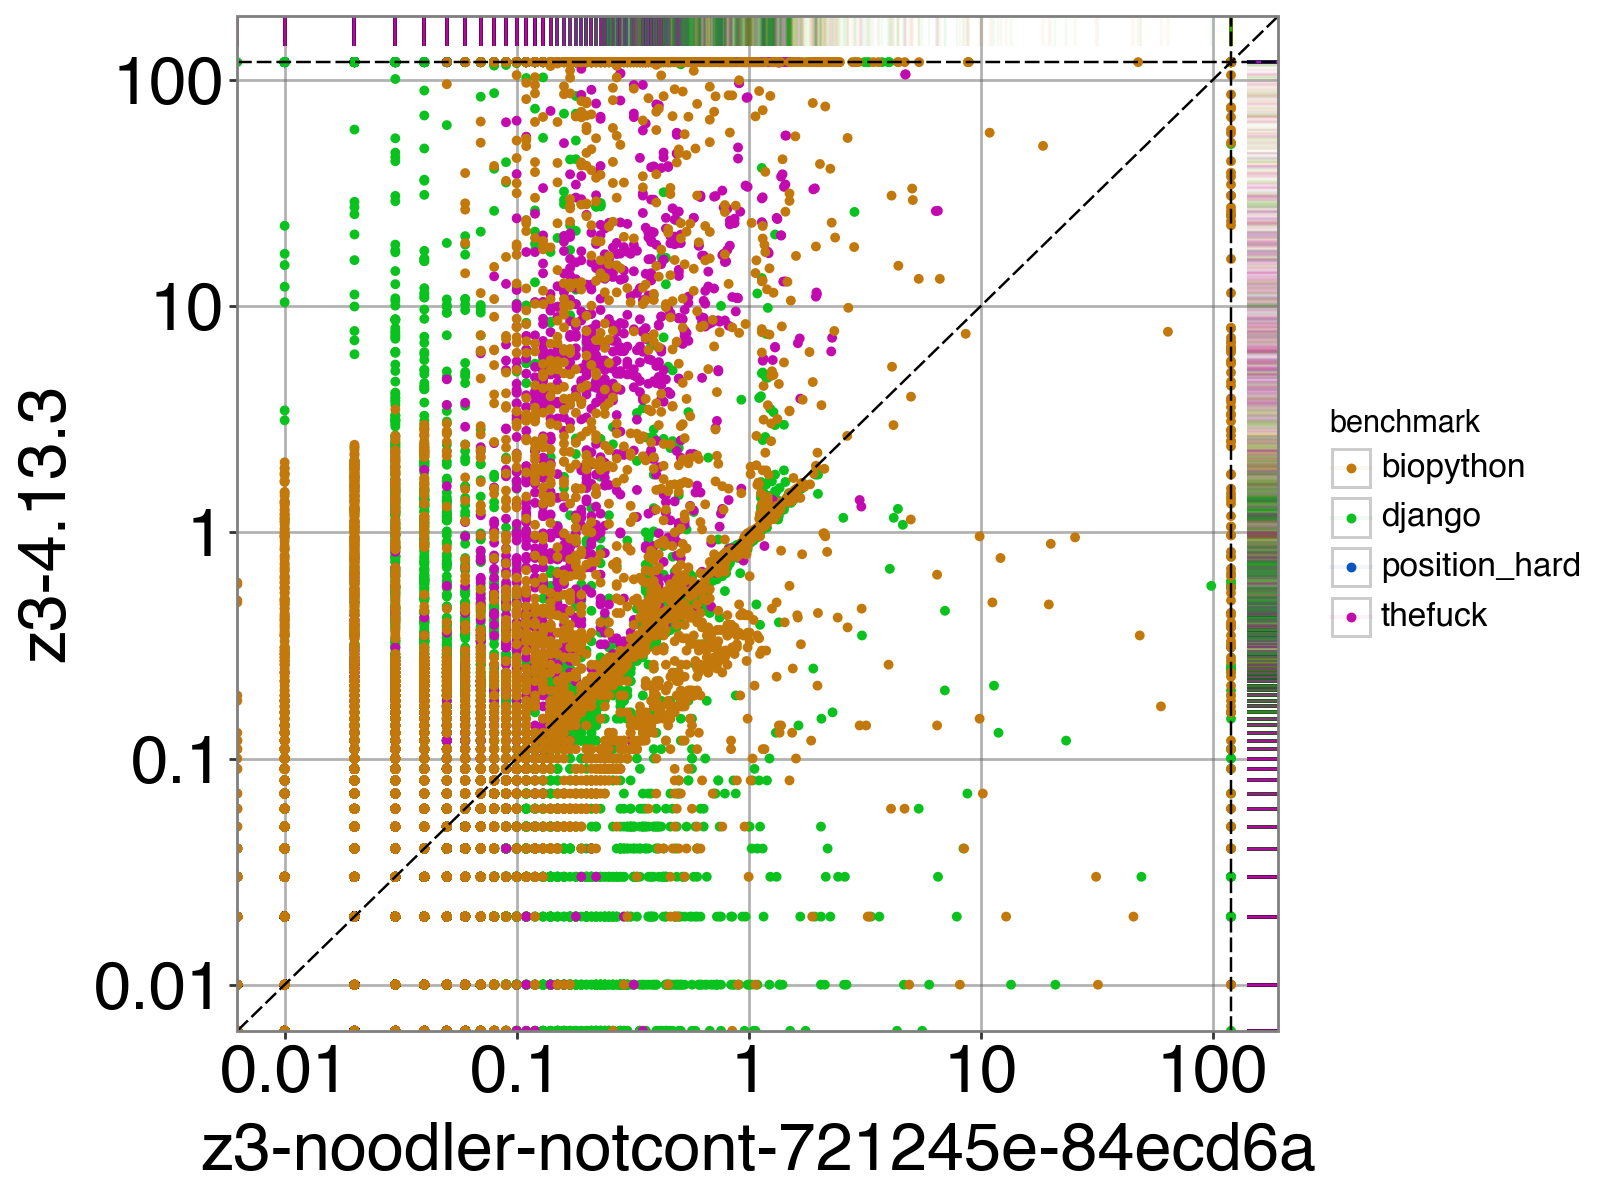

/Users/vhavlena/Documents/VeriFIT/Repo/String/smt-string-bench-results/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


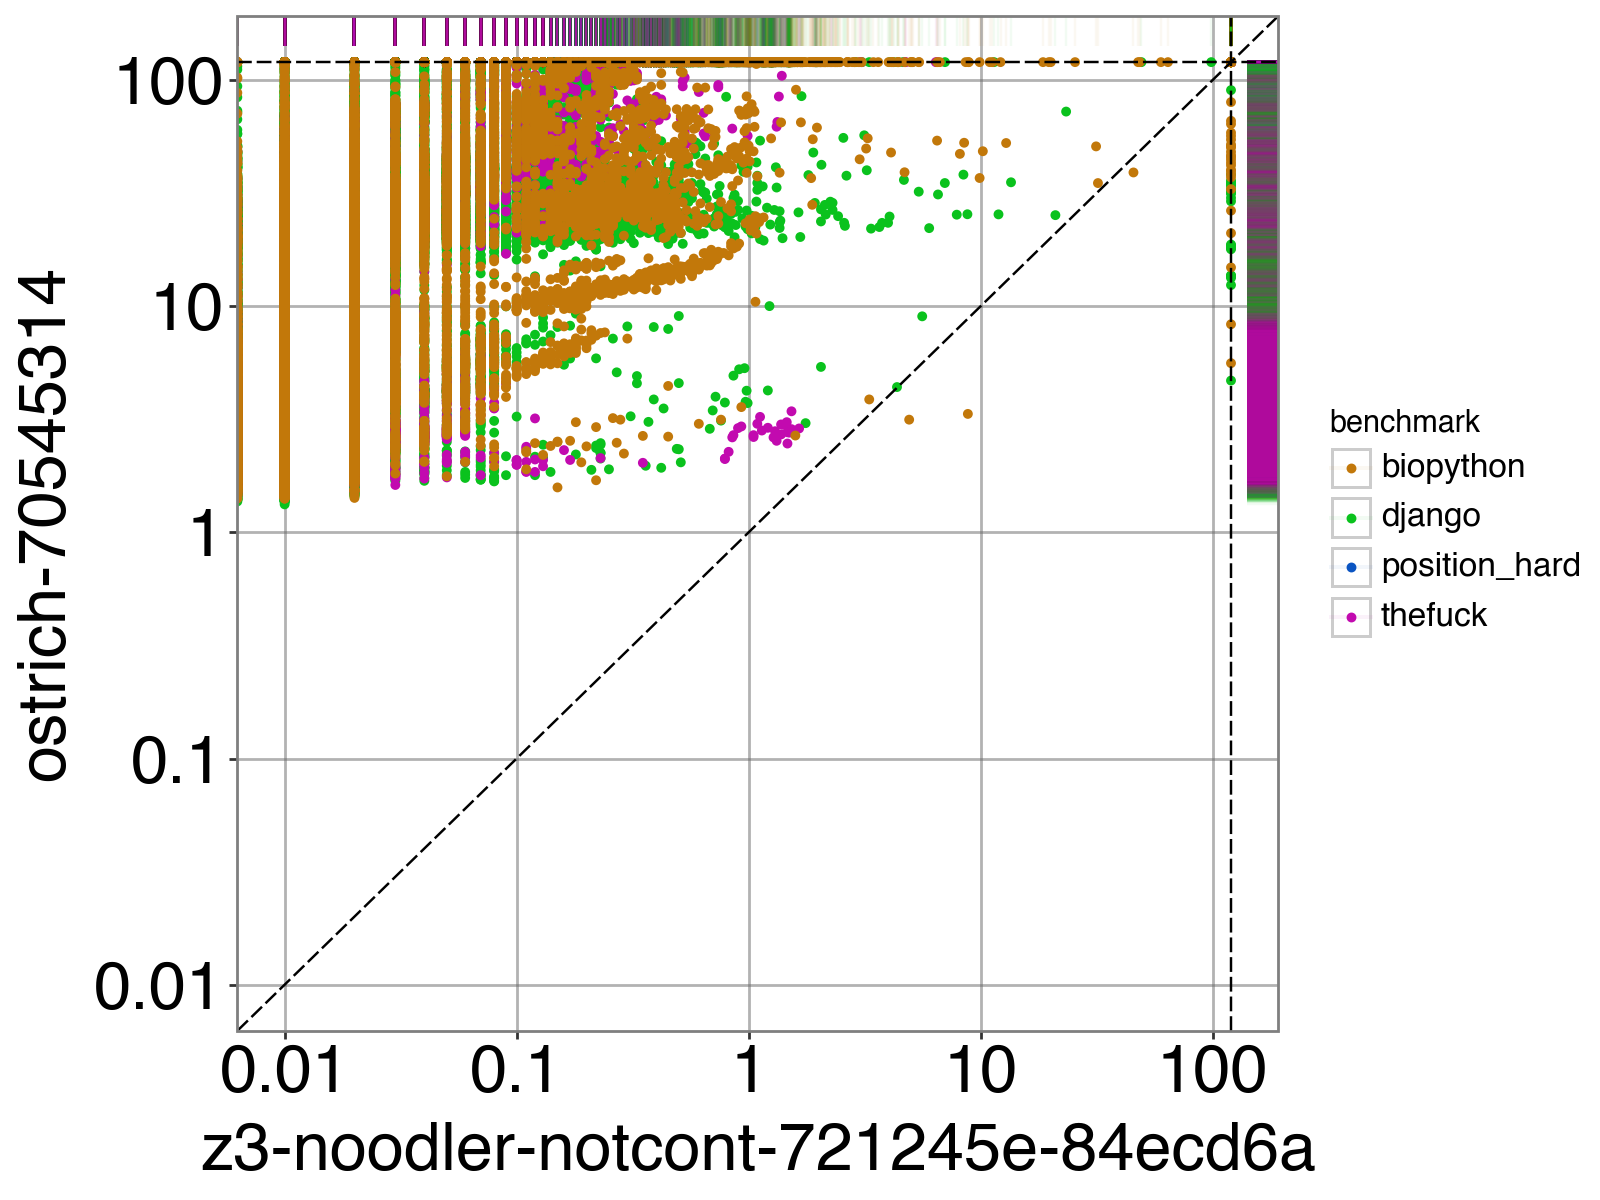

In [6]:
for tool in TOOLS:
    if tool != TOOL_FOR_COMPARISON:
        scatter_plot(df_all, TOOL_FOR_COMPARISON, tool, color_column="benchmark", timeout=TIMEOUT).show()


### More detailed evaluation

In [20]:
# check if noodler does not return different result than other solvers (i.e. wrong sat/unsat)
sanity_check(df_all, TOOL_FOR_COMPARISON, [tool for tool in TOOLS if tool!=TOOL_FOR_COMPARISON])

Empty DataFrame
Columns: [benchmark, benchmark-group, name, z3-noodler-notcont-5227eea-9bc5557-result, z3-noodler-notcont-5227eea-9bc5557-runtime, cvc5-1.2.0-result, cvc5-1.2.0-runtime, z3-4.13.4-result, z3-4.13.4-runtime, benchmark_group]
Index: []

In [21]:
# get all formulae where noodler gives different result than sat/unsat/unknown/TO/ERR
get_invalid(df_all, TOOL_FOR_COMPARISON)

Empty DataFrame
Columns: [benchmark, benchmark-group, name, z3-noodler-notcont-5227eea-9bc5557-result, z3-noodler-notcont-5227eea-9bc5557-runtime, cvc5-1.2.0-result, cvc5-1.2.0-runtime, z3-4.13.4-result, z3-4.13.4-runtime, benchmark_group]
Index: []

In [22]:
get_errors(df_all, TOOL_FOR_COMPARISON)

benchmark benchmark-group  \
17609     django      predicates   
17611     django      predicates   
17613     django      predicates   
17626     django      predicates   
17643     django      predicates   
...          ...             ...   
97830  biopython      predicates   
97854  biopython      predicates   
97856  biopython      predicates   
97859  biopython      predicates   
97866  biopython      predicates   

                                                    name  \
17609  ../formulae/trauc_benchmarks/django_2/08_djang...   
17611  ../formulae/trauc_benchmarks/django_2/08_djang...   
17613  ../formulae/trauc_benchmarks/django_2/08_djang...   
17626  ../formulae/trauc_benchmarks/django_2/08_djang...   
17643  ../formulae/trauc_benchmarks/django_2/08_djang...   
...                                                  ...   
97830  ../formulae/trauc_benchmarks/biopython_1/biopy...   
97854  ../formulae/trauc_benchmarks/biopython_1/biopy...   
97856  ../formulae/trauc_benchmarks/biopython_1/biopy...   
97859  ../formulae/trauc_benchmarks/biopython_1/biopy...   
97866  ../formulae/trauc_benchmarks/biopython_1/biopy...   

      z3-noodler-notcont-5227eea-9bc5557-result  \
17609                                       ERR   
17611                                       ERR   
17613                                       ERR   
17626                                       ERR   
17643                                       ERR   
...                                         ...   
97830                                       ERR   
97854                                       ERR   
97856                                       ERR   
97859                                       ERR   
97866                                       ERR   

       z3-noodler-notcont-5227eea-9bc5557-runtime cvc5-1.2.0-result  \
17609                                      1200.0               sat   
17611                                      1200.0               sat   
17613                                      1200.0               sat   
17626                                      1200.0               sat   
17643                                      1200.0               sat   
...                                           ...               ...   
97830                                      1200.0               sat   
97854                                      1200.0               sat   
97856                                      1200.0               sat   
97859                                      1200.0               sat   
97866                                      1200.0               sat   

       cvc5-1.2.0-runtime z3-4.13.4-result  z3-4.13.4-runtime benchmark_group  
17609                0.03              sat               0.02      predicates  
17611                0.04              sat               0.25      predicates  
17613                0.03              sat               0.61      predicates  
17626                0.03              sat               0.02      predicates  
17643                0.04              sat               0.09      predicates  
...                   ...              ...                ...             ...  
97830               35.70               TO            1200.00      predicates  
97854                0.06              sat               0.05      predicates  
97856                0.07              sat               1.76      predicates  
97859                0.07              sat               0.17      predicates  
97866                0.11              sat               5.49      predicates  

[137 rows x 10 columns]

In [36]:
get_timeouts(df_all, TOOL_FOR_COMPARISON)

benchmark benchmark-group  \
32079     django      predicates   
32359     django      predicates   
71811    thefuck      predicates   
71910    thefuck      predicates   
71917    thefuck      predicates   
...          ...             ...   
97854  biopython      predicates   
97856  biopython      predicates   
97859  biopython      predicates   
97861  biopython      predicates   
97866  biopython      predicates   

                                                    name  \
32079  ../formulae/trauc_benchmarks/django_3/08_djang...   
32359  ../formulae/trauc_benchmarks/django_3/08_djang...   
71811  ../formulae/trauc_benchmarks/thefuck/06_thefuc...   
71910  ../formulae/trauc_benchmarks/thefuck/06_thefuc...   
71917  ../formulae/trauc_benchmarks/thefuck/06_thefuc...   
...                                                  ...   
97854  ../formulae/trauc_benchmarks/biopython_1/biopy...   
97856  ../formulae/trauc_benchmarks/biopython_1/biopy...   
97859  ../formulae/trauc_benchmarks/biopython_1/biopy...   
97861  ../formulae/trauc_benchmarks/biopython_1/biopy...   
97866  ../formulae/trauc_benchmarks/biopython_1/biopy...   

      z3-noodler-notcont-25fc734-c943d6d-result  \
32079                                        TO   
32359                                        TO   
71811                                        TO   
71910                                        TO   
71917                                        TO   
...                                         ...   
97854                                        TO   
97856                                        TO   
97859                                        TO   
97861                                        TO   
97866                                        TO   

       z3-noodler-notcont-25fc734-c943d6d-runtime  \
32079                                       120.0   
32359                                       120.0   
71811                                       120.0   
71910                                       120.0   
71917                                       120.0   
...                                           ...   
97854                                       120.0   
97856                                       120.0   
97859                                       120.0   
97861                                       120.0   
97866                                       120.0   

      z3-noodler-notcont-721245e-84ecd6a-result  \
32079                                        TO   
32359                                        TO   
71811                                       sat   
71910                                       sat   
71917                                       sat   
...                                         ...   
97854                                        TO   
97856                                        TO   
97859                                        TO   
97861                                        TO   
97866                                        TO   

       z3-noodler-notcont-721245e-84ecd6a-runtime cvc5-1.2.0-result  \
32079                                      120.00               sat   
32359                                      120.00               sat   
71811                                        0.05               sat   
71910                                        0.05               sat   
71917                                        0.05               sat   
...                                           ...               ...   
97854                                      120.00               sat   
97856                                      120.00               sat   
97859                                      120.00               sat   
97861                                      120.00               sat   
97866                                      120.00               sat   

       cvc5-1.2.0-runtime z3-4.13.4-result  z3-4.13.4-runtime benchmark_group  
32079                0.08              sat               

In [ ]:
get_unknowns(df_all, TOOL_FOR_COMPARISON)

In [ ]:
get_solved(df_all, TOOL_FOR_COMPARISON)

In [ ]:
get_sat(df_all, TOOL_FOR_COMPARISON)

In [ ]:
get_unsat(df_all, TOOL_FOR_COMPARISON)

#### Statistics for instances where both Z3-Noodler and cvc5 finished

In [ ]:
df_filtered = df_all[(df_all[f"{NOODLER}-result"] != 'TO') & (df_all[f"{CVC5}-result"] != 'TO') & (df_all[f"{NOODLER}-result"] != 'ERR')]
print(simple_table(df_filtered, TOOLS, BENCHES, separately=False))

### TODO: For papers (tables and figures with nicer names or something) 

In [5]:
tool_names_mapping = {
    NOODLER : "Z3-Noodler-pos",
    NOODLER_MODEL : "Z3-Noodlerᴹ",
    CVC5 : "cvc5",
    CVC5_MODEL : "cvc5ᴹ",
    Z3 : "Z3",
    Z3_MODEL : "Z3ᴹ",
    Z3STR4 : "Z3stsr4",
    OSTRICH : "OSTRICH",
    Z3STR3RE : "Z3str3RE",
    Z3TRAU : "Z3-Trau",
    OLD_NOODLER : "Z3-Noodler",

    NOODLER_STATS : "Z3-Noodler-stats",
    NOODLER_ONLY_STABILIZATION: "Z3-Noodler-only-stabilization",
    NOODLER_NO_NIELSEN_STATS: "Z3-Noodler-no-Nielsen-stats",
    NOODLER_NO_LENGTH_STATS: "Z3-Noodler-no-length-stats",
    NOODLER_NO_MEMB_STATS: "Z3-Noodler-no-length-stats",
}

tool_latex_mapping = {
    NOODLER : "\\ziiinoodlerpos",
    CVC5 : "\\cvcv",
    Z3 : "\\ziii",
    NOODLER_MODEL : "\\ziiinoodlermodel",
    CVC5_MODEL : "\\cvcvmodel",
    Z3_MODEL : "\\ziiimodel",
    Z3STR4 : "\\ziiistriv",
    OSTRICH : "\\ostrich",
    Z3STR3RE : "\\ziiistriiire",
    Z3TRAU : "\\ziiitrau",
    OLD_NOODLER : "\\ziiinoodler",

    NOODLER_ONLY_STABILIZATION: "\\ziiinoodleronlystabilization",
    NOODLER_NO_NIELSEN_STATS: "\\ziiinoodlernonielsen",
    NOODLER_NO_LENGTH_STATS: "\\ziiinoodlernolength",
    NOODLER_NO_MEMB_STATS: "\\ziiinoodlernomemb",
}

BENCHMARK_TO_LATEX = {
    # Benchmark names.
    "sygus_qgen": "\\sygusqgen",
    "denghang": "\\denghang",
    "automatark": "\\automatark",
    "stringfuzz": "\\stringfuzz",
    "redos": "\\redos",

    "norn": "\\nornbench",
    "slog": "\\slog",
    "slent": "\\slent",
    "omark": "\\omark",
    "kepler": "\\keplerbench",
    "woorpje": "\\woorpje",
    "webapp": "\\webapp",
    "kaluza": "\\kaluza",

    "transducer_plus": "\\transducerplus",
    "leetcode": "\\leetcode",
    "str_small_rw": "\\strsmall",
    "pyex": "\\pyex",
    "full_str_int": "\\fullstrint",
    
    "django": "\\django",
    "biopython":"\\biopython",
    "thefuck": "\\thefuck",
    "selected_hard": "\\poshard",

    # Group names.
    REGEX_GROUP_NAME: "\\regexbench",
    EQUATIONS_GROUP_NAME: "\\eqbench",
    PREDICATES_GROUP_NAME: "\\predbench",
    "all": "All",
}

In [7]:
cactus_plot(df_all, [tool for tool in TOOLS if tool not in [
    NOODLER_STATS,
    NOODLER_NO_NIELSEN_STATS,
    NOODLER_NO_LENGTH_STATS,
    NOODLER_NO_MEMB_STATS,
    NOODLER_ONLY_STABILIZATION,
]], start=135700,#int(len(df_all)*0.98), 
height=3, width=16, put_legend_outside=True, logarithmic_y_axis=True,
                  tool_names=tool_names_mapping,
                  file_name_to_save="cactus",
                  num_of_x_ticks=11,
                )

<Axes: xlabel='Instances', ylabel='Runtime [s]'>

/Users/vhavlena/Documents/VeriFIT/Repo/String/smt-string-bench-results/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped
/var/folders/k8/vb71jppj43x35pc3qvksjy4w0000gn/T/ipykernel_91518/3171291488.py:3: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/Users/vhavlena/Documents/VeriFIT/Repo/String/smt-string-bench-results/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


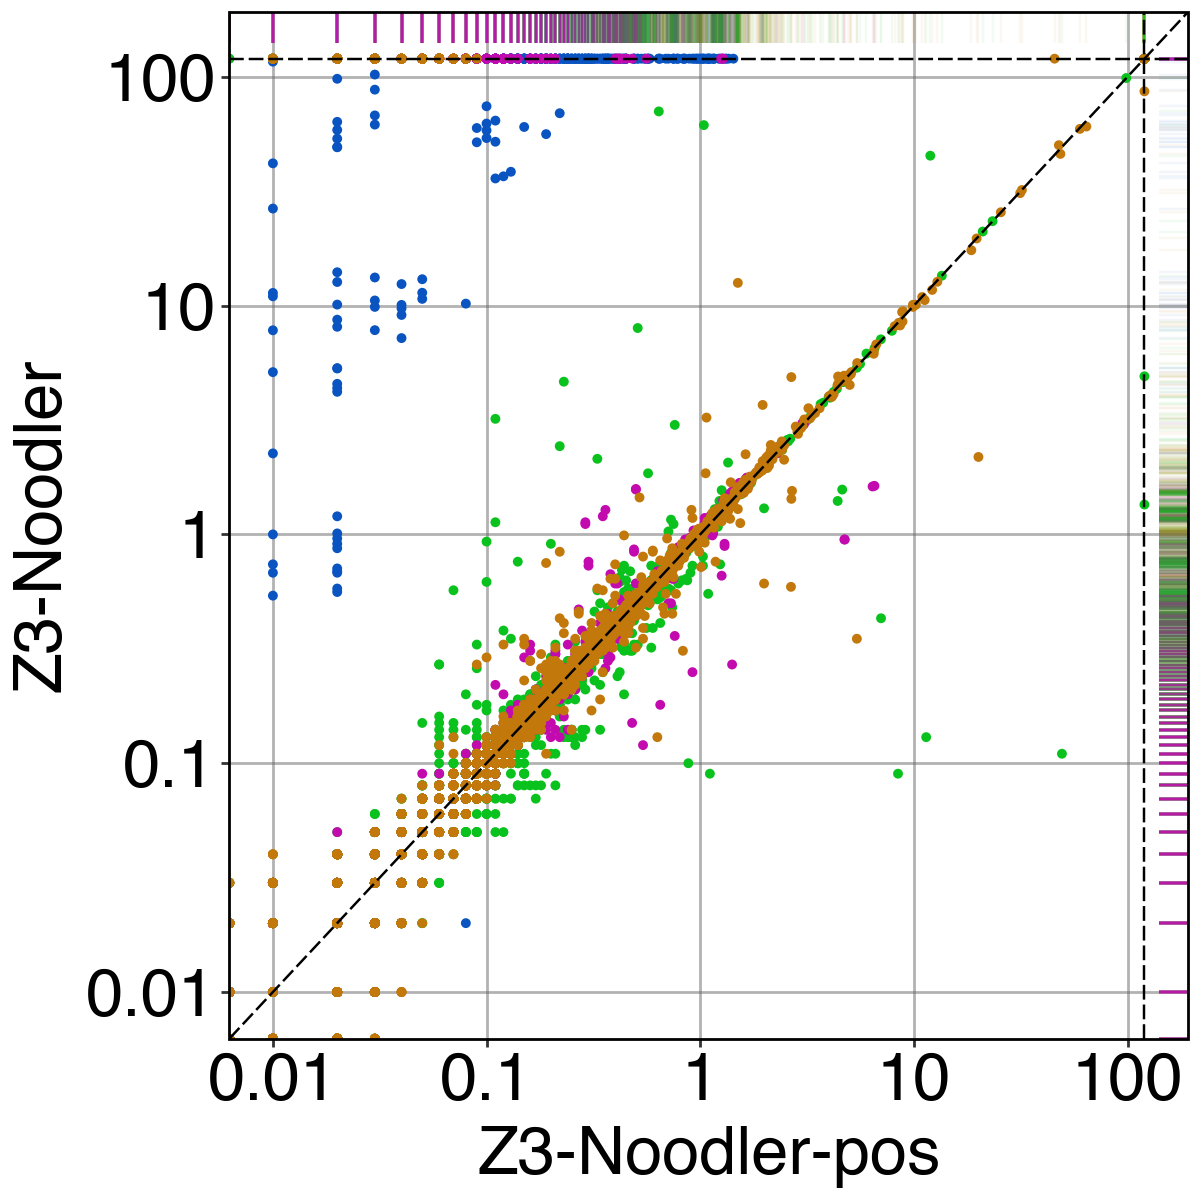

/Users/vhavlena/Documents/VeriFIT/Repo/String/smt-string-bench-results/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped
/var/folders/k8/vb71jppj43x35pc3qvksjy4w0000gn/T/ipykernel_91518/3171291488.py:3: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/Users/vhavlena/Documents/VeriFIT/Repo/String/smt-string-bench-results/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


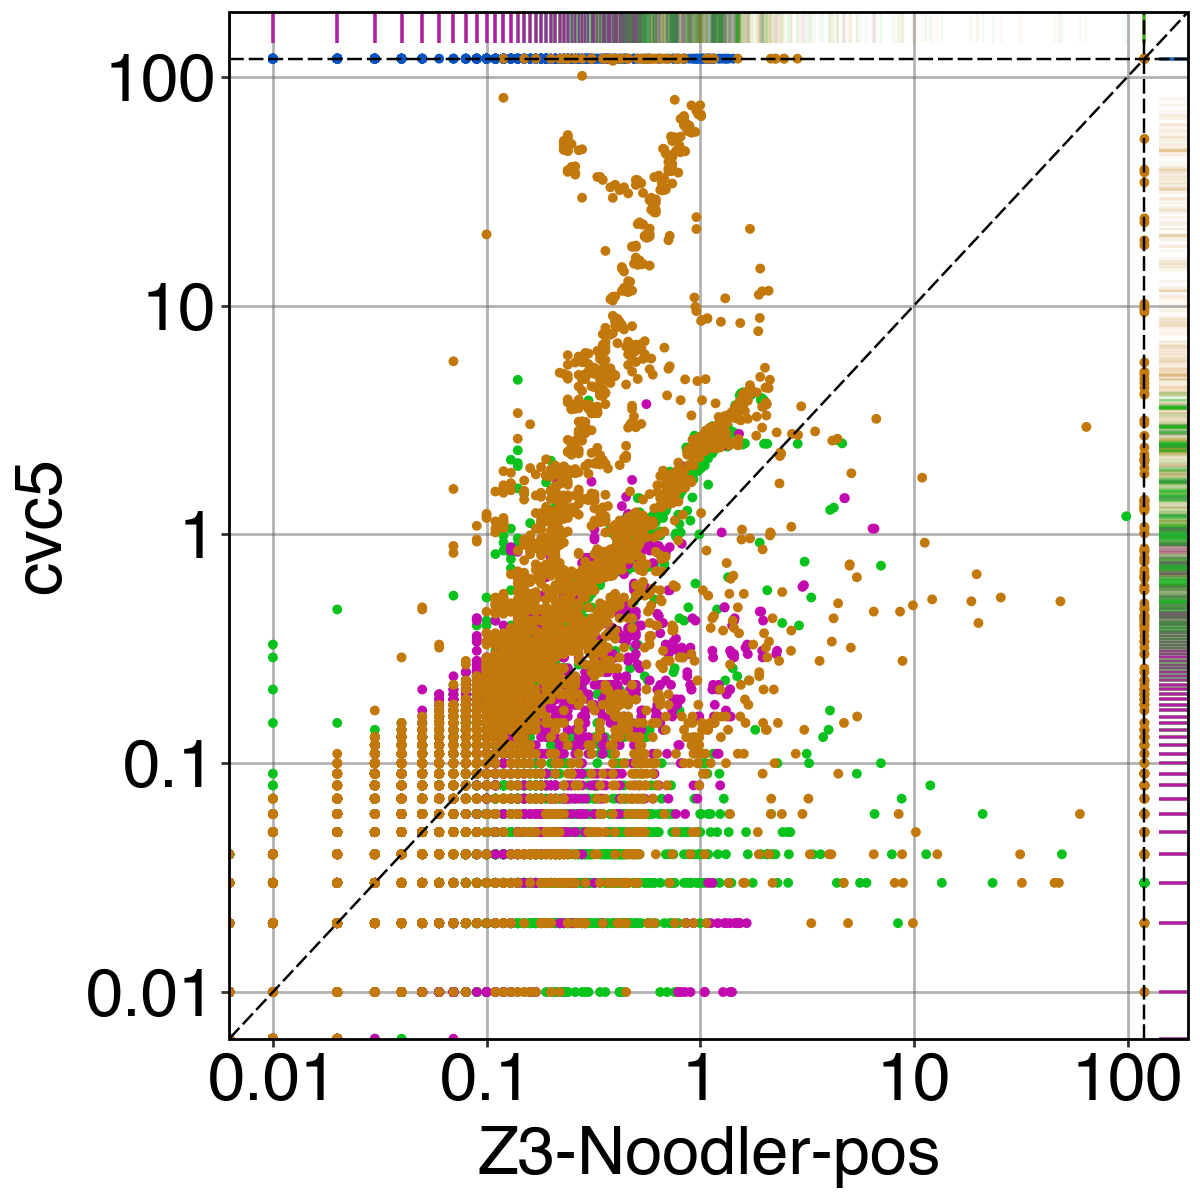

/Users/vhavlena/Documents/VeriFIT/Repo/String/smt-string-bench-results/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped
/var/folders/k8/vb71jppj43x35pc3qvksjy4w0000gn/T/ipykernel_91518/3171291488.py:3: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/Users/vhavlena/Documents/VeriFIT/Repo/String/smt-string-bench-results/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


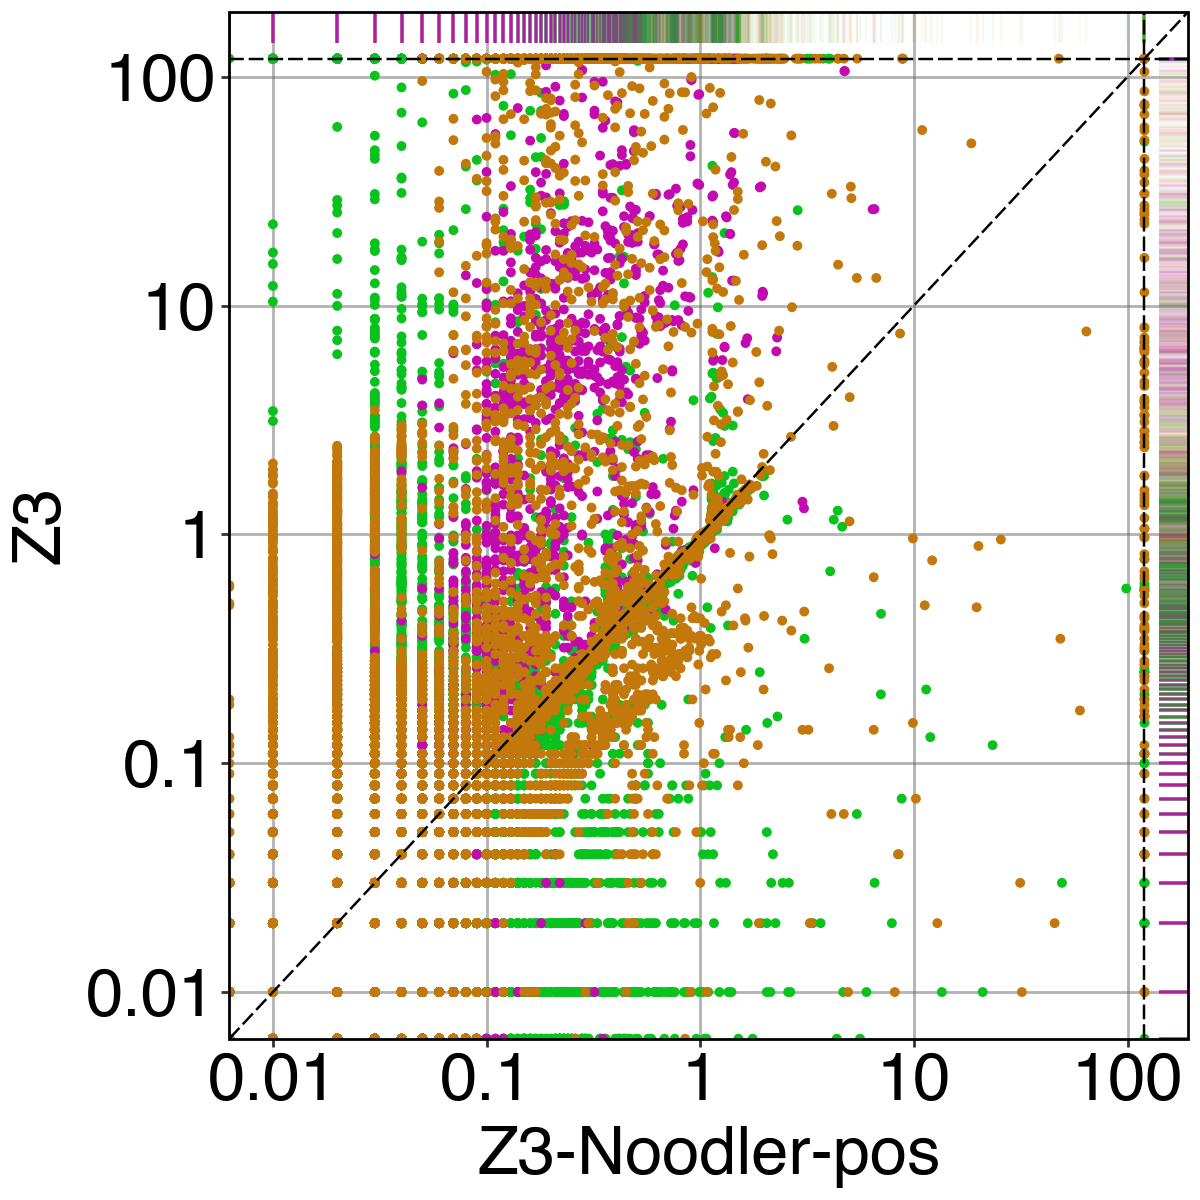

/Users/vhavlena/Documents/VeriFIT/Repo/String/smt-string-bench-results/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped
/var/folders/k8/vb71jppj43x35pc3qvksjy4w0000gn/T/ipykernel_91518/3171291488.py:3: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/Users/vhavlena/Documents/VeriFIT/Repo/String/smt-string-bench-results/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


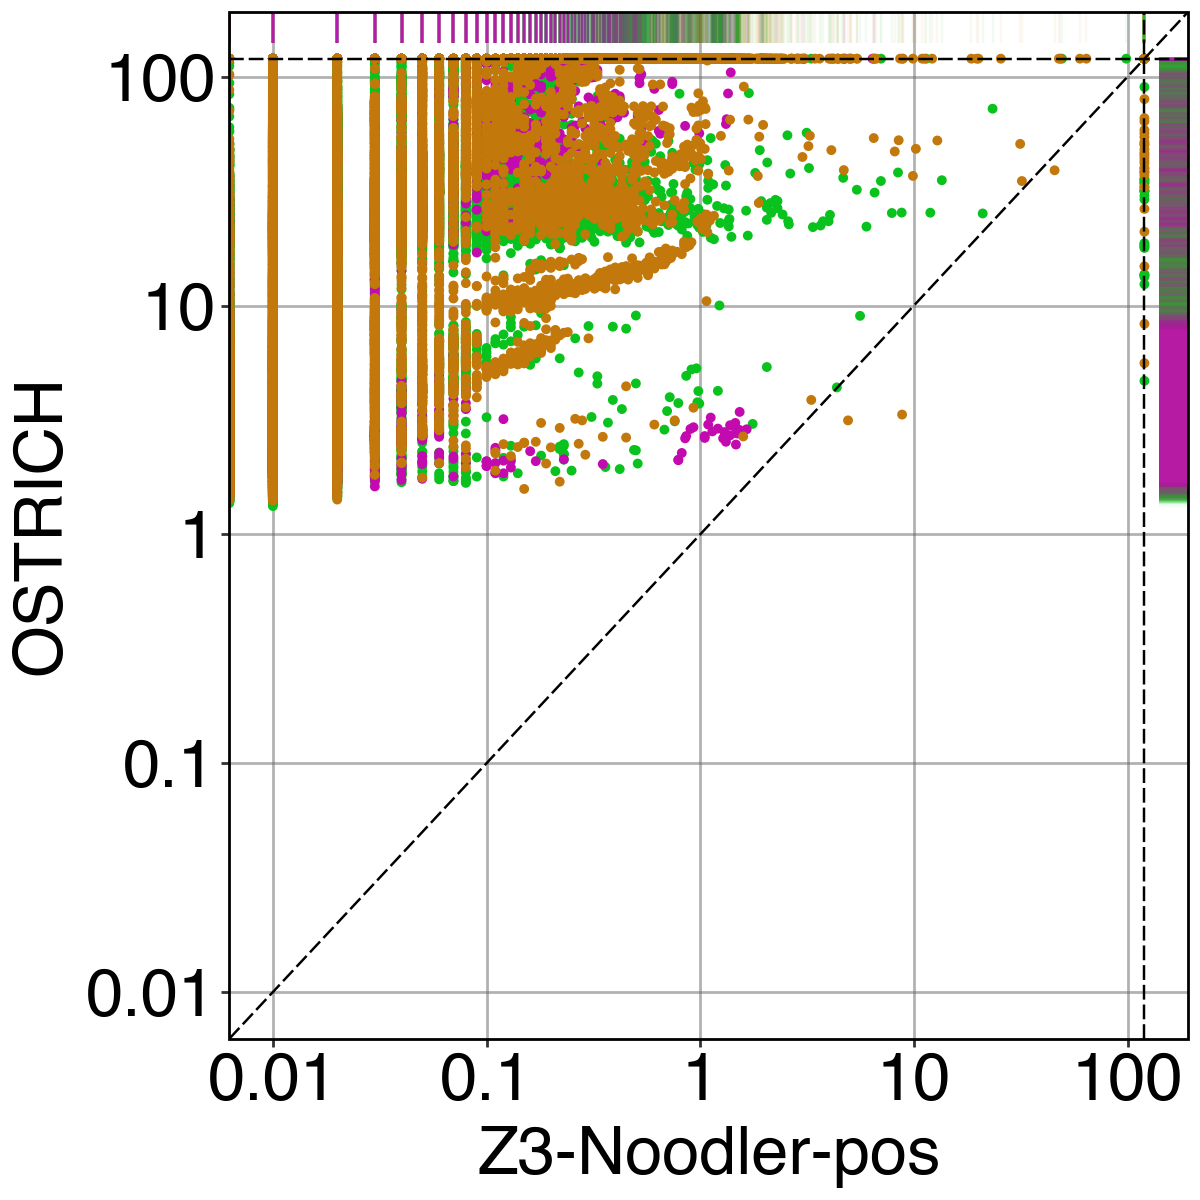

In [6]:
for tool in TOOLS:
    if tool != TOOL_FOR_COMPARISON:
        print(scatter_plot(df_all, TOOL_FOR_COMPARISON, tool,
                           xname=tool_names_mapping[NOODLER], yname=tool_names_mapping[tool],
                           file_name_to_save=f"{tool_names_mapping[tool]}_vs_{tool_names_mapping[TOOL_FOR_COMPARISON]}",
                           show_legend=False, transparent=True,
                           color_column="benchmark"
                           ))

In [ ]:
with open("test.tex", "w+") as f:
    f.write('\n'.join(write_latex_table_body(df_all, index_to_latex=BENCHMARK_TO_LATEX)))

In [ ]:
BENCHES_STATS = [benchmark for benchmark in BENCHES if benchmark not in ["transducer_plus"]]
df_all_stats = load_benches(BENCHES_STATS, TOOLS_STATS, bench_selection, BENCHMARK_TO_GROUP)
df_all_stats["benchmark_group"] = pd.Categorical(df_all_stats["benchmark"].apply(lambda x: BENCHMARK_TO_GROUP[x]), categories=[EQUATIONS_GROUP_NAME, PREDICATES_GROUP_NAME, REGEX_GROUP_NAME], ordered=True)

In [ ]:
df_solved_time = df_all.copy()

df_solved_time.replace({"benchmark": {"snia": "kaluza"}}, inplace=True)

for column in df_solved_time.columns:
    if column.endswith("-runtime"):
        df_solved_time[column] = df_solved_time[column].apply(lambda x: 0 if x == 120 else x)

result_columns = []
for column in df_solved_time.columns:
    if column.endswith("-result"):
        result_columns.append(column)
replace = {}
for result_column in result_columns:
    replace[result_column] = {"sat": 1, "unsat": 1, "unknown": 0, "TO": 0, "ERR": 0, "unsupported": 0}
df_solved_time.replace(replace, inplace=True)

for column in df_solved_time.columns:
    if column.endswith("-result"):
        df_solved_time[column] = df_solved_time[column].astype("Int64")
df_solved_time.drop(columns=["name"], inplace=True)
df_solved_time = df_solved_time[[ \
    "benchmark", "benchmark-group", \
    f"{NOODLER}-result", f"{NOODLER}-runtime", \
    f"{NOODLER_MODEL}-result", f"{NOODLER_MODEL}-runtime", \

    f"{NOODLER_ONLY_STABILIZATION}-result", f"{NOODLER_ONLY_STABILIZATION}-runtime", \

    f"{NOODLER_NO_NIELSEN_STATS}-result", f"{NOODLER_NO_NIELSEN_STATS}-runtime", \
    f"{NOODLER_NO_LENGTH_STATS}-result", f"{NOODLER_NO_LENGTH_STATS}-runtime", \
    f"{NOODLER_NO_MEMB_STATS}-result", f"{NOODLER_NO_MEMB_STATS}-runtime", \

    f"{CVC5}-result", f"{CVC5}-runtime", \
    f"{CVC5_MODEL}-result", f"{CVC5_MODEL}-runtime", \
    f"{Z3}-result", f"{Z3}-runtime", \
    f"{Z3_MODEL}-result", f"{Z3_MODEL}-runtime", \
]]
df_solved_time_per_benchmark = df_solved_time.drop(columns=["benchmark-group"]).groupby("benchmark").sum()

df_solved_time_per_group = df_solved_time.drop(columns=["benchmark"]).groupby("benchmark-group").sum()

df_solved_time_all = df_solved_time.copy()
df_solved_time_all["benchmark-group"] = "all"
df_solved_time_all = df_solved_time_all.drop(columns=["benchmark"]).groupby("benchmark-group").sum()
df_solved_time_per_group_all = pd.concat([df_solved_time_per_group, df_solved_time_all], sort=False)


df_solved_time_per_benchmark = solved_time_transpose_per_benchmark(df_solved_time_per_benchmark)
df_solved_time_per_group = solved_time_transpose_per_benchmark(df_solved_time_per_group)
df_solved_time_per_group_all = solved_time_transpose_per_benchmark(df_solved_time_per_group_all)

# Solved-time table for regex and predicates benchmarks.
regex_predicates_benches = [benchmark for benchmark in REGEX_BENCHES + PREDICATES_BENCHES if benchmark not in ["transducer_plus"]]
regex_predicates_benches_columns = []
for bench in regex_predicates_benches:
    regex_predicates_benches_columns.append(f"{bench}-result")
    regex_predicates_benches_columns.append(f"{bench}-runtime")
table_lines = table_solved_time(df_solved_time_per_benchmark[regex_predicates_benches_columns], df_all, regex_predicates_benches, BENCHMARK_TO_LATEX, tool_latex_mapping)

table_lines.insert(0, "\\begin{booktabs}{colspec={lQ[r,gray!30]Q[r,gray!30]rrQ[r,gray!30]Q[r,gray!30]rrQ[r,gray!30]Q[r,gray!30]rrQ[r,gray!30]Q[r,gray!30]rrQ[r,gray!30]Q[r,gray!30]},rowsep=0pt,row{5-6}={yellow},row{1}={white},cell{2,3}{even}={c=2}{c}}")
table_lines.insert(2, "& \\SetCell[c=10]{c} \\regexbench &&&&&&&&&& \\SetCell[c=8]{c} \\predbench &&&&&&&\\\\\\cmidrule[lr]{2-11}\\cmidrule[lr]{12-19}")
table_lines.insert(len(table_lines), "\\end{booktabs}")
with open("sum_solved_result_per_tool_for_benches_regex_predicates.tex", "w+") as f:
    f.write('\n'.join(table_lines))

# Solved-time table for equations benchmarks.
equations_benches_columns = []
for bench in EQUATIONS_BENCHES:
    equations_benches_columns.append(f"{bench}-result")
    equations_benches_columns.append(f"{bench}-runtime")
table_lines = table_solved_time(df_solved_time_per_benchmark[equations_benches_columns], df_all, EQUATIONS_BENCHES, BENCHMARK_TO_LATEX, tool_latex_mapping)
table_lines.insert(0, "\\begin{booktabs}{colspec={lQ[r,gray!30]Q[r,gray!30]rrQ[r,gray!30]Q[r,gray!30]rrQ[r,gray!30]Q[r,gray!30]rrQ[r,gray!30]Q[r,gray!30]rr},rowsep=0pt,row{5-6}={yellow},row{1}={white},cell{2,3}{even}={c=2}{c}}")
table_lines.insert(2, "& \\SetCell[c=16]{c} \\eqbench &&&&&&&&&&&&&&&\\\\\\cmidrule[lr]{2-17}")
table_lines.insert(len(table_lines), "\\end{booktabs}")
with open("sum_solved_result_per_tool_for_benches_equations.tex", "w+") as f:
    f.write('\n'.join(table_lines))


# Solved-time table for benchmark groups.
benchmark_group_names = list(BENCHES_GROUPS.keys()) + ["all"]
benches_groups_columns = []
for bench in benchmark_group_names:
    benches_groups_columns.append(f"{bench}-result")
    benches_groups_columns.append(f"{bench}-runtime")
table_lines = table_solved_time(df_solved_time_per_group_all[benches_groups_columns], df_all, benchmark_group_names, BENCHMARK_TO_LATEX, tool_latex_mapping, per_column="benchmark-group")
table_lines.insert(0, "\\begin{booktabs}{colspec={lQ[r,gray!30]Q[r,gray!30]rrQ[r,gray!30]Q[r,gray!30]rr},rowsep=0pt,row{4-5}={yellow},cell{1,2}{even}={c=2}{c}}")
# table_lines.insert(2, "& \\SetCell[c=2]{c} \\regexbench & & \\SetCell[c=2]{c} \\eqbench & & \\SetCell[c=2]{c} \\predbench & & \\SetCell[c=2]{c} All & \\\\\\cmidrule[lr]{2-9}")
table_lines.insert(len(table_lines), "\\end{booktabs}")
with open("sum_solved_result_per_tool_for_benchmark_groups.tex", "w+") as f:
    f.write('\n'.join(table_lines))

# Noodler Statistics

In [ ]:
order = []
for key in BENCHMARK_TO_GROUP.keys():
    if key == "transducer_plus":
        continue
    if key not in order:
        order.append(key)
for value in BENCHMARK_TO_GROUP.values():
    if value not in order:
        order.append(value)
df_stats, df_stats_zeroed_nans = get_stats_dfs(df_all_stats, NOODLER_STATS, order)
df_stats_groups = group_to_benchmark_groups(df_stats, BENCHMARK_TO_GROUP, order)
df_stats_groups_zeroed_nans = group_to_benchmark_groups(df_stats_zeroed_nans, BENCHMARK_TO_GROUP, order)

In [ ]:
df_stats_groups

In [ ]:
df_stats_zeroed_nans

In [ ]:
get_stats_grouped_by_benchmark(df_stats_zeroed_nans, NOODLER_STATS)

In [ ]:
get_stats_grouped_by_benchmark(df_stats_groups_zeroed_nans, NOODLER_STATS)

In [ ]:
get_stats_grouped_by_benchmark_counts(df_stats, NOODLER_STATS)

In [ ]:
get_stats_grouped_by_benchmark_counts(df_stats_groups, NOODLER_STATS)

In [ ]:
get_stats_total(df_stats_zeroed_nans, NOODLER_STATS, BENCHES)

In [ ]:
df_stats_per_benchmark_sum = get_stats_per_benchmark_paper(df_stats_zeroed_nans)
df_stats_per_benchmark_sum

In [ ]:
with open("stats_per_benchmark.tex", "w+") as f:
    f.write('\n'.join(write_latex_table_body(df_stats_per_benchmark_sum, index_to_latex=BENCHMARK_TO_LATEX)[4:-2]))
with open("stats_per_benchmark_no_preprocess.tex", "w+") as f:
    f.write('\n'.join(write_latex_table_body(df_stats_per_benchmark_sum.drop([benchmark for benchmark in df_stats_per_benchmark_sum.keys() if benchmark.endswith("-preprocess")], axis='columns'), index_to_latex=BENCHMARK_TO_LATEX)[4:-2]))
with open("stats_per_benchmark_no_preprocess_percents.tex", "w+") as f:
    f.write('\n'.join(write_latex_table_body(df_stats_per_benchmark_sum.drop([benchmark for benchmark in df_stats_per_benchmark_sum.keys() if benchmark.endswith("-preprocess")], axis='columns'),index_to_latex=BENCHMARK_TO_LATEX, float_format="{:.2f}\\,\\%")[4:-2]))

In [ ]:
df_stats_per_group_sum = get_stats_per_benchmark_paper(df_stats_groups_zeroed_nans)
df_stats_per_group_sum

In [ ]:
with open("stats_per_group.tex", "w+") as f:
    f.write('\n'.join(write_latex_table_body(df_stats_per_group_sum, index_to_latex=BENCHMARK_TO_LATEX, float_format="{:.2f}")[4:-2]))

with open("stats_per_group_no_preprocess_no_preprocess.tex", "w+") as f:
    f.write('\n'.join(write_latex_table_body(df_stats_per_group_sum.drop([benchmark for benchmark in df_stats_per_group_sum.keys() if benchmark.endswith("-preprocess")], axis='columns'),index_to_latex=BENCHMARK_TO_LATEX)[4:-2]))

with open("stats_per_group_no_preprocess_percents.tex", "w+") as f:
    f.write('\n'.join(write_latex_table_body(df_stats_per_benchmark_sum.drop([benchmark for benchmark in df_stats_per_benchmark_sum.keys() if benchmark.endswith("-preprocess")], axis='columns'),index_to_latex=BENCHMARK_TO_LATEX, float_format="{:.2f}\\,\\%")[4:-2]))

In [ ]:
df_stats_total_sum = get_stats_per_benchmark_paper(group_to_benchmark_groups(df_stats_zeroed_nans, lambda _: "total"))
df_stats_total_sum

In [ ]:
df_stats_groups_total = pd.concat([df_stats_per_group_sum, df_stats_total_sum])
df_stats_groups_total = df_stats_groups_total.drop("noodler-final_checks", axis='columns')
df_stats_groups_total

In [ ]:
with open("stats_per_group_total.tex", "w+") as f:
    f.write('\n'.join(write_latex_table_body(df_stats_groups_total, index_to_latex=BENCHMARK_TO_LATEX)[4:-2]))

with open("stats_per_group_total_no_preprocess.tex", "w+") as f:
    f.write('\n'.join(write_latex_table_body(df_stats_groups_total.drop([benchmark for benchmark in df_stats_per_group_sum.keys() if benchmark.endswith("-preprocess")], axis='columns'), index_to_latex=BENCHMARK_TO_LATEX)[4:-2]))

with open("stats_per_group_total_no_preprocess_percents.tex", "w+") as f:
    f.write('\n'.join(write_latex_table_body(df_stats_groups_total.drop([benchmark for benchmark in df_stats_groups_total.keys() if benchmark.endswith("-preprocess")], axis='columns'), index_to_latex=BENCHMARK_TO_LATEX, float_format="{:.2f}\\,\\%")[4:-2]))

df_stats_groups_total_transposed = df_stats_groups_total.transpose()

with open("stats_per_group_total_transposed.tex", "w+") as f:
    f.write('\n'.join(write_latex_table_body(df_stats_groups_total_transposed, index_to_latex=BENCHMARK_TO_LATEX, format_index_name=False)[3:-2]))

df_stats_groups_total_transposed = df_stats_groups_total.drop([benchmark for benchmark in df_stats_groups_total if benchmark.endswith("-preprocess")], axis='columns').transpose()

with open("stats_per_group_total_no_preprocess_transposed.tex", "w+") as f:
    f.write('\n'.join(write_latex_table_body(df_stats_groups_total_transposed, index_to_latex=BENCHMARK_TO_LATEX, format_index_name=False)[3:-2]))

with open("stats_per_group_total_no_preprocess_percents_transposed.tex", "w+") as f:
    f.write('\n'.join(write_latex_table_body(df_stats_groups_total_transposed, index_to_latex=BENCHMARK_TO_LATEX, float_format="{:.2f}\\,\\%", format_index_name=False)[3:-2]))

df_stats_groups_total_special_transposed = pd.DataFrame(columns=list(df_stats_groups_total_transposed.keys()))

concat_rows = []
for index, _ in df_stats_groups_total_transposed.iterrows():
    if not index.endswith("-start"):
        continue

    index_start_name = index
    index_finish_name = index_start_name.replace("-start", "-finish")
    procedure_name = index_start_name.replace("-start", "")
    start_row = df_stats_groups_total_transposed.loc[[index_start_name]]
    finish_row = df_stats_groups_total_transposed.loc[[index_finish_name]]

    concat_row = [procedure_name]
    values_start = list(start_row.values)
    values_finish = list(finish_row.values)
    for val_start, val_finish in zip(values_start, values_finish):
        for val_start, val_finish in zip(val_start, val_finish):
            concat_row += [val_start, val_finish]

    concat_rows.append(concat_row)

columns = ["procedure"]
for column in df_stats_groups_total_transposed.keys():
    columns.append(f"{column}-start")
    columns.append(f"{column}-finish")
df_concat_rows = pd.DataFrame(concat_rows, columns=columns)
df_concat_rows.set_index("procedure", inplace=True)

with open("stats_per_group_total_special_transposed.tex", "w+") as f:
    f.write('\n'.join(write_latex_table_body(df_concat_rows, index_to_latex=BENCHMARK_TO_LATEX)[4:-2]))